# ML project on predicting whether a game will be a success or a failure

## This is my first Induvidual ML project so I didn't make it too complicated.
## The aim of this project is too predict whether a game will successful or not and the dataset that I'm using is  on kaggle and it's named 'Video game sales and ratings'. I couldnt get a dataset for the budgets of different games so I'm using the mean budget and profit indices to produce the outcome. I decided that 1 million units would be deemed a success for a game from AAA studio and 50k units would be deemed  success for a game from an Indie studio

In [1]:
#importing basic modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
#importing the csv file  and creating a dataset
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-processing

In [4]:
#removing null values as I don't want to use mean values in consideration of incorrect output
df['Critic_Score'].isnull().head(),df['User_Score'].isnull().head()

(0    False
 1     True
 2    False
 3    False
 4     True
 Name: Critic_Score, dtype: bool,
 0    False
 1     True
 2    False
 3    False
 4     True
 Name: User_Score, dtype: bool)

In [5]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [6]:
df.shape

(16719, 16)

In [7]:
# I ran into an issue where I couldn't use the dataset without making a copy, So I made this new dataframe consisting of the remaining columns
removed = df.copy()
removed.dropna(inplace=True)

In [8]:
removed.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [9]:
# Dropping columns that I deemed useless for the scope of this project
to_drop = ['Critic_Count', 'Rating', 'User_Count', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
removed.drop(to_drop, axis = 1, inplace=True)

In [10]:
#A final check for any null vlaues
removed.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
Global_Sales       0
Critic_Score       0
User_Score         0
Developer          0
dtype: int64

In [11]:
# I find that the User_Score column is of object datatype but I want it to be in float datatype
removed.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
Global_Sales       float64
Critic_Score       float64
User_Score          object
Developer           object
dtype: object

In [12]:
#changing the datatype of the User_Score column
removed['User_Score'] = removed['User_Score'].astype(str).astype(float)

In [13]:
removed.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
Global_Sales       float64
Critic_Score       float64
User_Score         float64
Developer           object
dtype: object

In [14]:
removed.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,8.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,8.3,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,8.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,8.5,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,6.6,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.32,87.0,8.4,Nintendo
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,23.21,91.0,8.6,Nintendo
13,Wii Fit,Wii,2007.0,Sports,Nintendo,22.70,80.0,7.7,Nintendo
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,21.81,61.0,6.3,Good Science Studio
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,21.79,80.0,7.4,Nintendo


In [15]:
removed.index

Int64Index([    0,     2,     3,     6,     7,     8,    11,    13,    14,
               15,
            ...
            16624, 16631, 16634, 16644, 16656, 16667, 16677, 16696, 16700,
            16706],
           dtype='int64', length=6825)

In [16]:
removed.index = range(1,6826)

In [17]:
# multiplying the values of User_Score so that the can be in the same format as that of Critic_Score
removed['User_Score'] = removed['User_Score'].values * 10

In [18]:
# importing a database that I created by using a table from wikipedia for chechking the presence of any indie Developers
indie = pd.read_csv("List_of_indie_game_developers.csv")

### I wanted to check for indie devs because the term success differs for indie Devs as their budgets are usually lower than that of AAA rated companies.

In [19]:
indie.head()

,Developers
0,11 bit studios
1,ACE Team
2,Akupara Games
3,Alec Holowka
4,Alientrap


In [20]:
# Creating a column with bolean values depicting whether the developer of the specific game is an indie dev or not. Here 1 and 0 are indie dev and not indie devs res.
check_Dev = []

count = 0
for i in removed['Developer']:
    if i in indie.values:
        check_Dev.append(1)
        count += 1
    else:
        check_Dev.append(0)
removed['Indie Developer or not'] = check_Dev

    


In [21]:
removed.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,Developer,Indie Developer or not
6821,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,46.0,24.0,Fluid Studios,0
6822,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,81.0,88.0,Criterion Games,0
6823,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.01,80.0,76.0,Kojima Productions,0
6824,Breach,PC,2011.0,Shooter,Destineer,0.01,61.0,58.0,Atomic Games,0
6825,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.01,60.0,72.0,SimBin,0


In [22]:
removed[removed['Indie Developer or not'] == 1].tail()


,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,Developer,Indie Developer or not
6754,Serious Sam II,PC,2005.0,Shooter,Take-Two Interactive,0.01,74.0,70.0,Croteam,1
6762,Sherlock Holmes: The Devil's Daughter,PC,2016.0,Adventure,Bigben Interactive,0.01,65.0,73.0,Frogwares,1
6778,Goat Simulator,XOne,2016.0,Simulation,Koch Media,0.01,53.0,63.0,Coffee Stain Studios,1
6779,TimeShift,PC,2007.0,Shooter,Vivendi Games,0.01,71.0,76.0,Saber Interactive,1
6795,Sherlock Holmes: The Devil's Daughter,PS4,2016.0,Adventure,Bigben Interactive,0.01,70.0,68.0,Frogwares,1


In [23]:
# checking the total list of genres and evaluating which genre has the highest average global sales.
list_of_genres = []
for genre in removed['Genre']:
    if genre not in list_of_genres:
        list_of_genres.append(genre)
    else:
        continue
list_of_genres
    

['Sports',
 'Racing',
 'Platform',
 'Misc',
 'Action',
 'Puzzle',
 'Shooter',
 'Fighting',
 'Simulation',
 'Role-Playing',
 'Adventure',
 'Strategy']

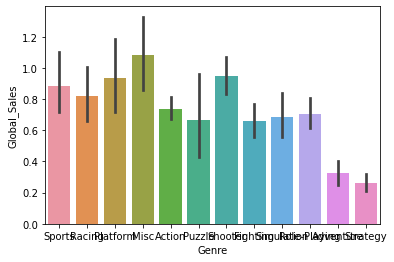

In [24]:
sns.barplot(x = removed['Genre'], y = removed['Global_Sales'] )
plt.rc('figure', figsize = (30,5))

In [25]:
removed.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,Developer,Indie Developer or not
6821,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,46.0,24.0,Fluid Studios,0
6822,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,81.0,88.0,Criterion Games,0
6823,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.01,80.0,76.0,Kojima Productions,0
6824,Breach,PC,2011.0,Shooter,Destineer,0.01,61.0,58.0,Atomic Games,0
6825,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.01,60.0,72.0,SimBin,0


In [26]:
# defining success for a game
# For this project I thought the AAA companies selling more than 1 million units will be considered as a success and for indie devs selling more than 50k units is considered as a success
success = []
for x in range(6825):
    if removed['Indie Developer or not'].iloc[x] == 1:
        if removed['Global_Sales'].iloc[x] >= 0.05:
            success.append(1)
        else:
            success.append(0)
    elif removed['Global_Sales'].iloc[x] >= 1:
        success.append(1)
    else:
        success.append(0)
len(success)

6825

In [27]:
removed['Success_or_Failure'] = success

In [28]:
removed

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,Developer,Indie Developer or not,Success_or_Failure
1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,80.0,Nintendo,0,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,83.0,Nintendo,0,1
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,80.0,Nintendo,0,1
4,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,85.0,Nintendo,0,1
5,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,66.0,Nintendo,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6821,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,46.0,24.0,Fluid Studios,0,0
6822,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,81.0,88.0,Criterion Games,0,0
6823,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.01,80.0,76.0,Kojima Productions,0,0
6824,Breach,PC,2011.0,Shooter,Destineer,0.01,61.0,58.0,Atomic Games,0,0


In [29]:
x = removed.iloc[:,1:9]
y = removed.iloc[:,-1] 

## Data Visualisation

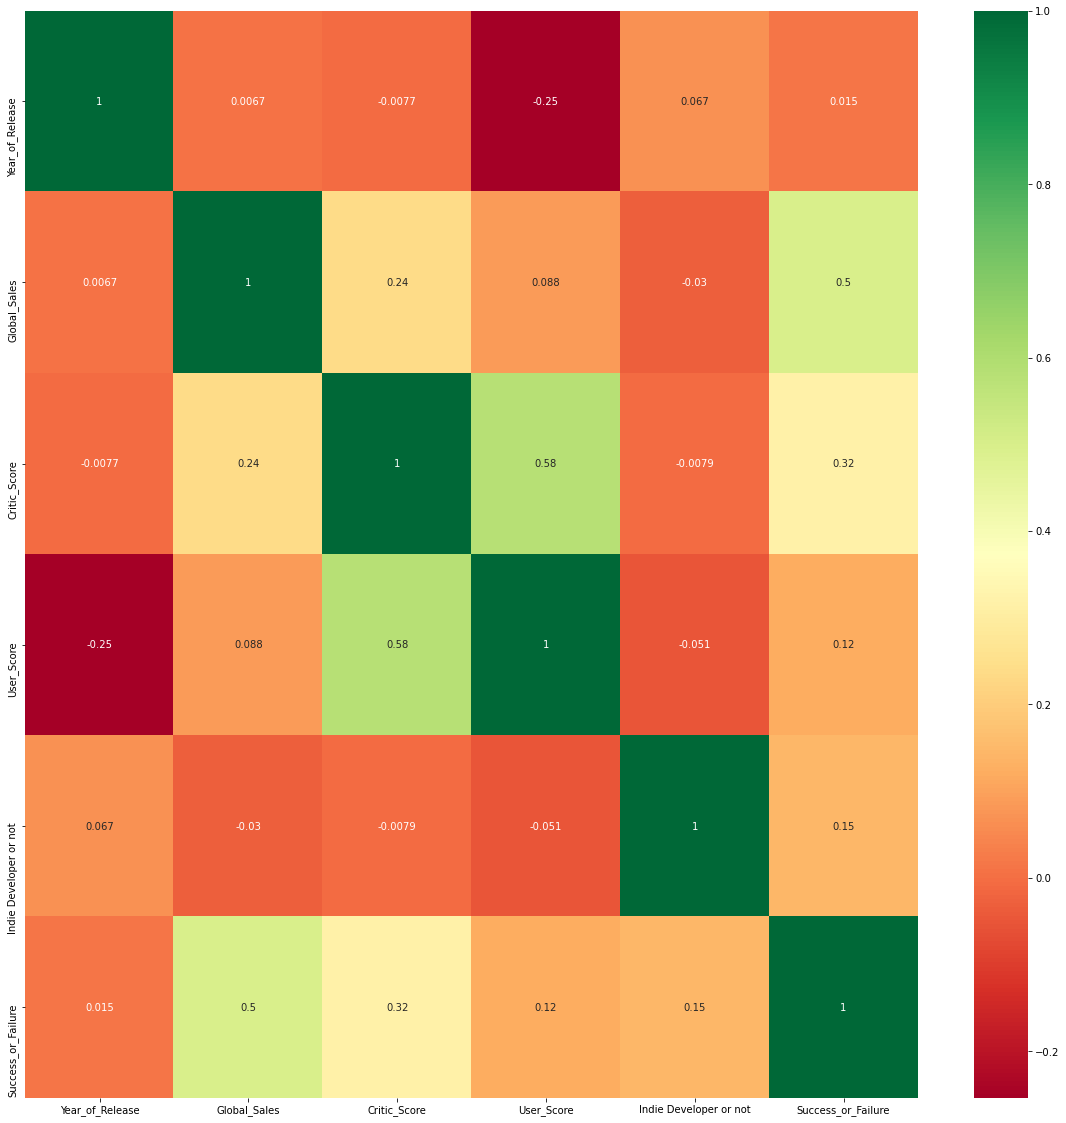

In [30]:
# checking correlation between the columns
corrmat = removed.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(removed[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [31]:
# finding the most influential features
x = removed.iloc[:,5:8]
y = removed.iloc[:,-1] 
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs        Score
0  Global_Sales  8332.141667
1  Critic_Score  1876.506708
2    User_Score   297.388846


In [32]:
def score_group(score):
    if score >= 90:
        return '90-100'
    elif score >= 80:
        return '80-89'
    elif score >= 70:
        return '70-79'
    elif score >= 60:
        return '60-69'
    elif score >= 50:
        return '50-59'
    else:
        return '0-49'

In [33]:
dfh = removed.dropna(subset=['Critic_Score']).reset_index(drop=True)
dfh['Score_Group'] = dfh['Critic_Score'].apply(lambda x: score_group(x))

In [34]:
def in_top(x):
    if x in pack:
        return x
    else:
        pass
def width(x):
    if x == 'Platform':
        return 14.4
    elif x == 'Developer':
        return 13.2
    elif x == 'Publisher':
        return 11.3
    elif x == 'Genre':
        return 13.6

def height(x):
    if x == 'Genre':
        return 8
    else:
        return 9

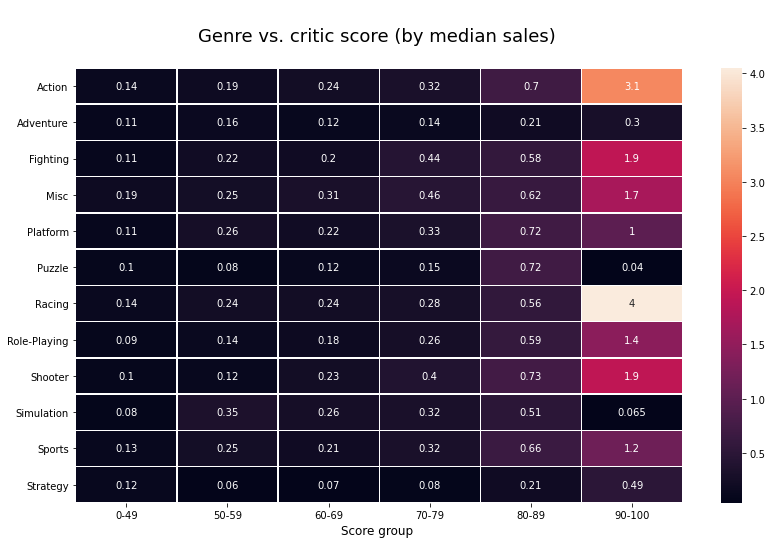

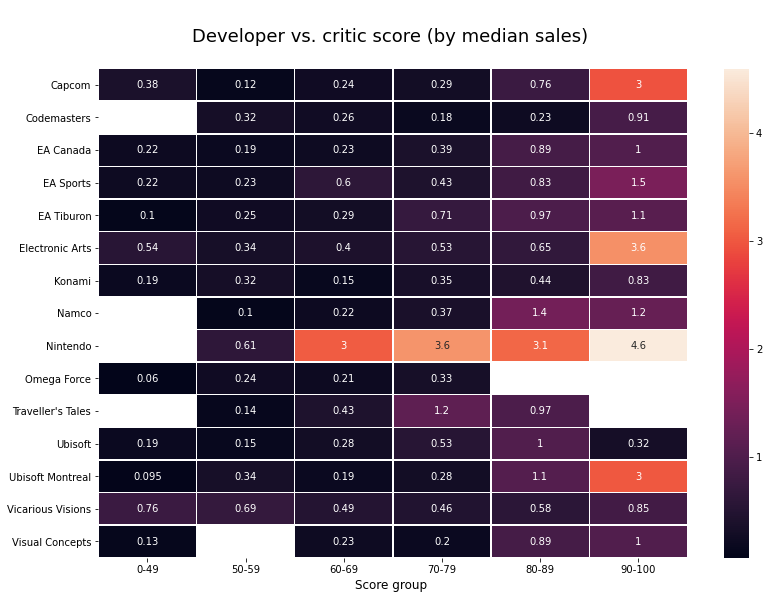

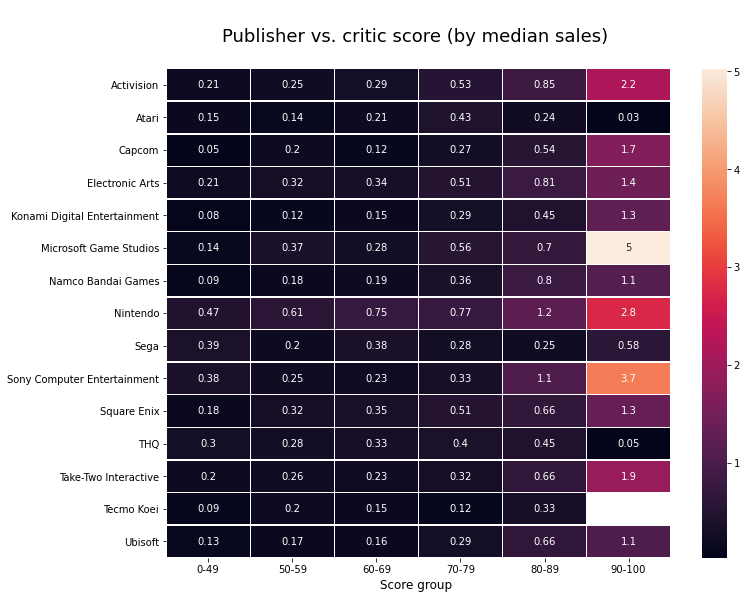

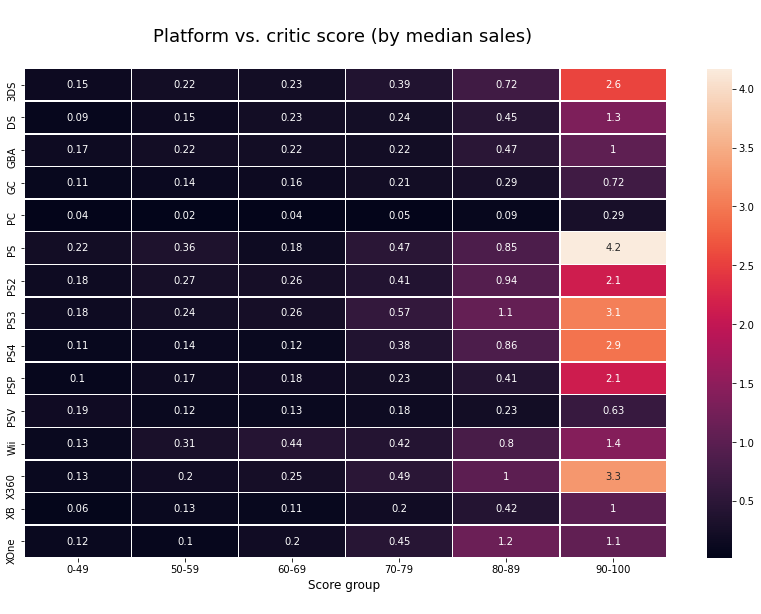

In [35]:
# creating heatmaps for correlation between different columns
cols = ['Genre', 'Developer', 'Publisher', 'Platform']
for col in cols:
    pack = []
    top = dfh[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()[:15]
    for x in top[col]:
        pack.append(x)
    dfh[col] = dfh[col].apply(lambda x: in_top(x))
    dfh_platform = dfh[[col, 'Score_Group', 'Global_Sales']].groupby([col, 'Score_Group']).median().reset_index().pivot(col, "Score_Group", "Global_Sales")
    plt.figure(figsize=(width(col), height(col)))
    sns.heatmap(dfh_platform, annot=True, fmt=".2g", linewidths=.5).set_title((' \n'+col+' vs. critic score (by median sales) \n'), fontsize=18)
    plt.ylabel('', fontsize=14)
    plt.xlabel('Score group \n', fontsize=12)
    pack = []

In [36]:
#I noticed that i had some object type datapoints and realized this late into the project that I wont be able to use them so I converted them to category type to use one hot encoding on them and get value that i can actually feed to a model
cols = ['Genre', 'Developer', 'Publisher', 'Platform']
removed[cols] = removed[cols].astype('category')
removed.dtypes

Name                        object
Platform                  category
Year_of_Release            float64
Genre                     category
Publisher                 category
Global_Sales               float64
Critic_Score               float64
User_Score                 float64
Developer                 category
Indie Developer or not       int64
Success_or_Failure           int64
dtype: object

In [37]:
print(removed['Platform'].unique())
print(removed['Genre'].unique())
print(removed['Publisher'].unique())
print(removed['Developer'].unique())

[Wii, DS, X360, PS3, PS2, ..., GC, GBA, XOne, PSV, DC]
Length: 17
Categories (17, object): [Wii, DS, X360, PS3, ..., GBA, XOne, PSV, DC]
[Sports, Racing, Platform, Misc, Action, ..., Fighting, Simulation, Role-Playing, Adventure, Strategy]
Length: 12
Categories (12, object): [Sports, Racing, Platform, Misc, ..., Simulation, Role-Playing, Adventure, Strategy]
[Nintendo, Microsoft Game Studios, Take-Two Interactive, Sony Computer Entertainment, Activision, ..., Lighthouse Interactive, CDV Software Entertainment, Encore, Blue Byte, NewKidCo]
Length: 262
Categories (262, object): [Nintendo, Microsoft Game Studios, Take-Two Interactive, Sony Computer Entertainment, ..., CDV Software Entertainment, Encore, Blue Byte, NewKidCo]
[Nintendo, Good Science Studio, Rockstar North, Polyphony Digital, Infinity Ward, Sledgehammer Games, ..., High Moon Studios, Mercenary Technologies, Infinite Dreams, Paragon 5, Big Red Software, Fluid Studios, Atomic Games]
Length: 1289
Categories (1289, object): [Nin

In [38]:
removed['Platform_Cat'] = removed['Platform'].cat.codes
removed['Genre_Cat'] = removed['Genre'].cat.codes
removed['Publisher_Cat'] = removed['Publisher'].cat.codes
removed['Developer_Cat'] = removed['Developer'].cat.codes
removed


,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,Developer,Indie Developer or not,Success_or_Failure,Platform_Cat,Genre_Cat,Publisher_Cat,Developer_Cat
1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,80.0,Nintendo,0,1,12,10,160,771
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,83.0,Nintendo,0,1,12,6,160,771
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,80.0,Nintendo,0,1,12,10,160,771
4,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,85.0,Nintendo,0,1,2,4,160,771
5,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,66.0,Nintendo,0,1,12,3,160,771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,46.0,24.0,Fluid Studios,0,0,3,0,158,411
6822,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,81.0,88.0,Criterion Games,0,0,3,2,146,260
6823,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.01,80.0,76.0,Kojima Productions,0,0,5,0,123,617
6824,Breach,PC,2011.0,Shooter,Destineer,0.01,61.0,58.0,Atomic Games,0,0,5,8,53,99


In [39]:
final = pd.get_dummies(removed, columns=["Platform","Genre","Publisher","Developer"], prefix=["Platform_is","Genre_is","Publisher_is","Developer_is"] )
final.columns

Index(['Name', 'Year_of_Release', 'Global_Sales', 'Critic_Score', 'User_Score',
       'Indie Developer or not', 'Success_or_Failure', 'Platform_Cat',
       'Genre_Cat', 'Publisher_Cat',
       ...
       'Developer_is_h.a.n.d. Inc.', 'Developer_is_iNiS',
       'Developer_is_id Software', 'Developer_is_id Software, Nerve Software',
       'Developer_is_id Software, Raven Software', 'Developer_is_n-Space',
       'Developer_is_neo Software', 'Developer_is_odenis studio',
       'Developer_is_syn Sophia', 'Developer_is_zSlide'],
      dtype='object', length=1591)

In [40]:
req_col = final.pop('Success_or_Failure')


In [41]:
final.insert(1590, 'Success_or_Failure', req_col)
final.columns

Index(['Name', 'Year_of_Release', 'Global_Sales', 'Critic_Score', 'User_Score',
       'Indie Developer or not', 'Platform_Cat', 'Genre_Cat', 'Publisher_Cat',
       'Developer_Cat',
       ...
       'Developer_is_iNiS', 'Developer_is_id Software',
       'Developer_is_id Software, Nerve Software',
       'Developer_is_id Software, Raven Software', 'Developer_is_n-Space',
       'Developer_is_neo Software', 'Developer_is_odenis studio',
       'Developer_is_syn Sophia', 'Developer_is_zSlide', 'Success_or_Failure'],
      dtype='object', length=1591)

In [42]:
final.drop(['Name'],axis=1,inplace = True)

In [43]:
drop = ['Success_or_Failure', 'Genre_Cat', 'Publisher_Cat', 'Platform_Cat', 'Developer_Cat']
final_copy = pd.get_dummies(final)
final2 = final_copy
y = final['Success_or_Failure'].values
final2 = final2.drop(drop,axis=1)
X = final2.values

## Model implementation and Training

In [44]:
# importing necessary modules for model creation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm

In [45]:
# Splitting the dataset 90-10 since I have a small amount of data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10, random_state=2)


In [46]:
# Radndom forest Classifier
radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
y_val_1 = radm.predict(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.8038067349926794


In [47]:
#Logistic Regression
log_reg = LogisticRegression(max_iter=5000).fit(Xtrain, ytrain)
y_val_2 = log_reg.predict(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.8038067349926794


## Evaluation and parameter tuning

In [48]:
all_predictions = log_reg.predict(Xtest)
print(classification_report(ytest, all_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       549
           1       0.99      0.96      0.97       134

    accuracy                           0.99       683
   macro avg       0.99      0.98      0.98       683
weighted avg       0.99      0.99      0.99       683



AttributeError: module 'seaborn' has no attribute 'plt'

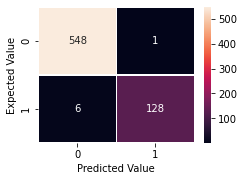

In [49]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(ytest, all_predictions), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
sns.plt.title('Training Set Confusion Matrix')

## Conclusion
### So both RFC and LR gave the same prediction accuracy of ≈80% which was my goal, But intially it was at 76% percent before I tuned my algorithm. I increased the training dataset and increased the max_iter to 5000 from its orginal 100 in logistic regression which gave me the current accuracy. I wouldn't say that I'm satisfied but I'm happy that I did something.